In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import deque
import random
import time
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,SimpleRNN, LSTM, GRU, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import warnings 
warnings.filterwarnings("ignore")

In [90]:
# from google.colab import files
# uploaded = files.upload()

In [91]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']), parse_dates=['Date'])

In [92]:
# df_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']), parse_dates=['Date'])

In [93]:
df = pd.read_csv('Google_Stock_Price_Train.csv', parse_dates=['Date'])

In [94]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv', parse_dates=['Date'])

In [95]:
frames = [df, df_test]

In [96]:
df_main = pd.concat(frames)

In [97]:
df_main.head(-1)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
14,2017-01-24,822.30,825.90,817.82,823.87,"1,474,000"
15,2017-01-25,829.62,835.77,825.06,835.67,"1,494,500"
16,2017-01-26,837.81,838.00,827.01,832.15,"2,973,900"
17,2017-01-27,834.71,841.95,820.44,823.31,"2,965,800"


In [98]:
df_main = df_main.reset_index()

In [99]:
df_main.head(-18)

,index,Date,Open,High,Low,Close,Volume
0,0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...,...
1255,1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"
1257,1257,2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"
1258,0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"


In [100]:
df_main = df_main.drop(columns=('index'))

In [101]:
df_main.head(-1)

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1272,2017-01-24,822.30,825.90,817.82,823.87,"1,474,000"
1273,2017-01-25,829.62,835.77,825.06,835.67,"1,494,500"
1274,2017-01-26,837.81,838.00,827.01,832.15,"2,973,900"
1275,2017-01-27,834.71,841.95,820.44,823.31,"2,965,800"


In [102]:
df_main.replace(',','', regex=True, inplace=True)

In [103]:
df_main['Date'] = (df_main['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [104]:
df_main['Open'] = pd.to_numeric(df_main['Open'], downcast="float")
df_main['High'] = pd.to_numeric(df_main['High'], downcast="float")
df_main['Low'] = pd.to_numeric(df_main['Low'], downcast="float")
df_main['Close'] = pd.to_numeric(df_main['Close'], downcast="float")
df_main['Volume'] = pd.to_numeric(df_main['Volume'], downcast="float")

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

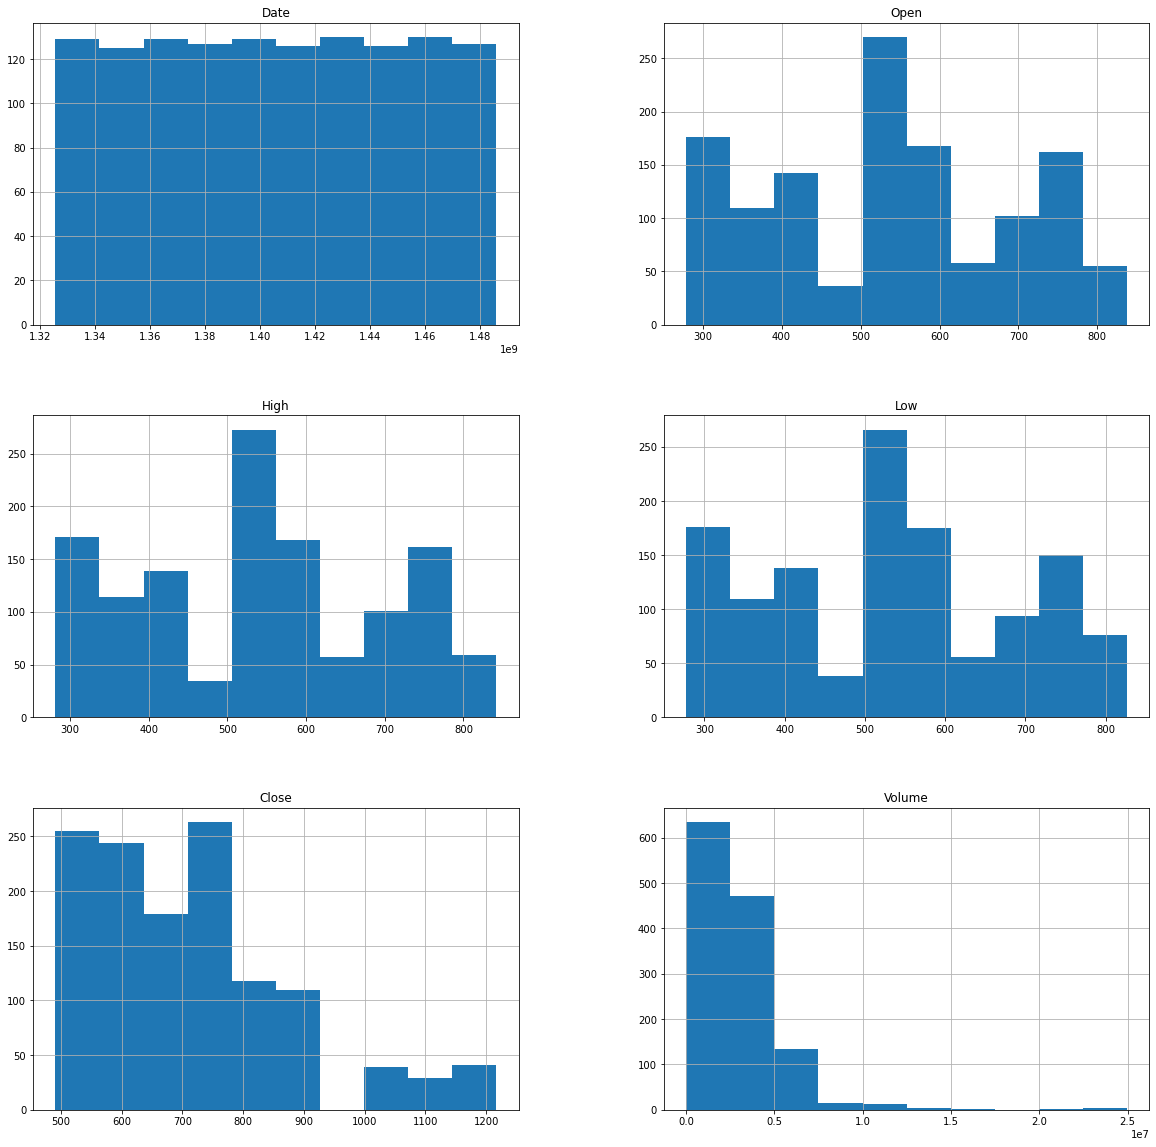

In [105]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_main.hist(ax = ax)

In [106]:
df_main['Close'].iloc[0:560] = df_main['Close'].iloc[0:560]/2.002  # 1000 shares split into 2002 so divide it by 2.002 upto 26 march 2014

In [107]:
df_main.head(561)

,Date,Open,High,Low,Close,Volume
0,1325548800,325.250000,332.829987,324.970001,331.463531,7380500.0
1,1325635200,331.269989,333.869995,329.079987,332.892090,5749400.0
2,1325721600,329.829987,330.750000,326.890015,328.276733,6590300.0
3,1325808000,328.339996,328.769989,323.679993,323.796173,5405900.0
4,1326067200,322.040009,322.290009,309.459991,310.069916,11688800.0
...,...,...,...,...,...,...
556,1395360000,600.900024,602.559998,589.020020,589.310669,6441000.0
557,1395619200,589.880005,590.239990,570.840027,576.803162,6096800.0
558,1395705600,580.820007,582.739990,571.359985,577.197815,4838400.0
559,1395792000,578.840027,583.599976,563.640015,563.871094,5179200.0


In [108]:
df_main.head()

,Date,Open,High,Low,Close,Volume
0,1325548800,325.250000,332.829987,324.970001,331.463531,7380500.0
1,1325635200,331.269989,333.869995,329.079987,332.892090,5749400.0
2,1325721600,329.829987,330.750000,326.890015,328.276733,6590300.0
3,1325808000,328.339996,328.769989,323.679993,323.796173,5405900.0
4,1326067200,322.040009,322.290009,309.459991,310.069916,11688800.0


In [109]:
# df_main['Daily Mean'] = [0]*len(df_main)

In [110]:
# for i in range(len(df_main)):
#     df_main['Daily Mean'].iloc[i] = (df_main['Open'].iloc[i]+df_main['Close'].iloc[i])/2   # calculating daily mean

In [111]:
df_main['EMA'] = df_main['Close'].ewm(alpha=0.1, adjust=False).mean()

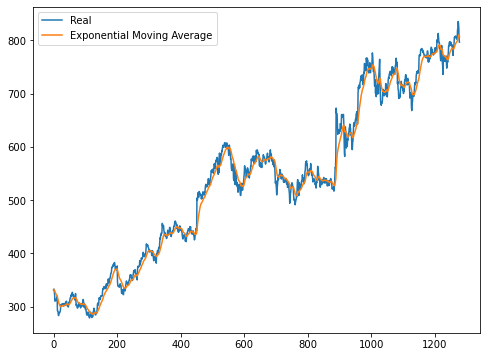

In [112]:
plt.figure(figsize = (8,6))
plt.plot(df_main['Close'], label='Real')
plt.plot(df_main['EMA'], label='Exponential Moving Average')
plt.legend(loc = 'best')

In [113]:
df_main['50 days Moving Average'] = df_main['Close'].shift(-20).rolling(50, min_periods = 1).mean()

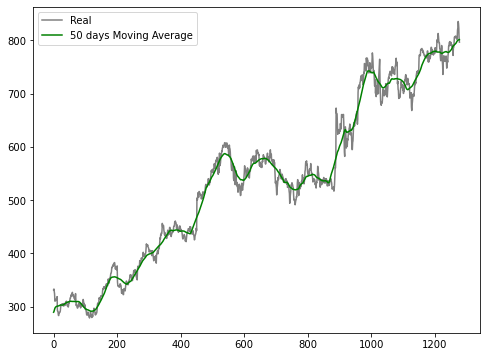

In [114]:
plt.figure(figsize = (8,6))
plt.plot(df_main['Close'], label='Real', color = 'grey')
plt.plot(df_main['50 days Moving Average'], label='50 days Moving Average', color = 'green')
plt.legend(loc = 'best')
plt.show()

In [26]:
# Calculating commodity channel index
typical_price = (df_main['High'] + df_main['Low'] + df_main['Close'])/3
moving_average = typical_price/20
mean_deviation = (typical_price - moving_average)/20
df_main['CCI'] = (typical_price - moving_average)/(0.015 * mean_deviation)

In [27]:
df_main.head(-5)

,Date,Open,High,Low,Close,Volume,EMA,20 days Moving Average,CCI
0,1325548800,325.250000,332.829987,324.970001,331.463531,7380500.0,331.463531,289.330658,1333.333252
1,1325635200,331.269989,333.869995,329.079987,332.892090,5749400.0,331.606387,290.397095,1333.333374
2,1325721600,329.829987,330.750000,326.890015,328.276733,6590300.0,331.273422,292.615712,1333.333374
3,1325808000,328.339996,328.769989,323.679993,323.796173,5405900.0,330.525697,295.313431,1333.333374
4,1326067200,322.040009,322.290009,309.459991,310.069916,11688800.0,328.480119,296.701288,1333.333252
...,...,...,...,...,...,...,...,...,...
1268,1484697600,805.809998,806.210022,800.989990,806.070007,1294400.0,797.205408,797.058202,1333.333374
1269,1484784000,805.119995,809.479980,801.799988,802.169983,919300.0,797.701866,797.967102,1333.333252
1270,1484870400,806.909973,806.909973,801.690002,805.020020,1670000.0,798.433681,799.017294,1333.333252
1271,1485129600,807.250000,820.869995,803.739990,819.309998,1963600.0,800.521313,799.790275,1333.333496


In [28]:
df_main['EMA'] = pd.to_numeric(df_main['EMA'], downcast="float")
df_main['CCI'] = pd.to_numeric(df_main['CCI'], downcast="float")
df_main['20 days Moving Average'] = pd.to_numeric(df_main['20 days Moving Average'], downcast="float")

In [29]:
PAST_SEQ = 30
FUTURE_PRED = 1
EPOCHS = 20
BATCH_SIZE = 1

In [30]:
NAME = f"{PAST_SEQ} - Sequences- {FUTURE_PRED} - Future Period - {int(time.time())}"

def target(present, future):                    # to see whether its a buy or sell, 2 days into the future
    if float(future) > float(present):
        return 1
    else:
        return 0
    
df_main['Future'] = df_main['Close'].shift(-FUTURE_PRED)  # shifting close column up by 2 days to get future value after 2 days


df_main.head()

,Date,Open,High,Low,Close,Volume,EMA,20 days Moving Average,CCI,Future
0,1325548800,325.250000,332.829987,324.970001,331.463531,7380500.0,331.463531,289.330658,1333.333252,332.892090
1,1325635200,331.269989,333.869995,329.079987,332.892090,5749400.0,331.606384,290.397095,1333.333374,328.276733
2,1325721600,329.829987,330.750000,326.890015,328.276733,6590300.0,331.273407,292.615723,1333.333374,323.796173
3,1325808000,328.339996,328.769989,323.679993,323.796173,5405900.0,330.525696,295.313416,1333.333374,310.069916
4,1326067200,322.040009,322.290009,309.459991,310.069916,11688800.0,328.480133,296.701294,1333.333252,310.404572


In [31]:
df_main['Target'] = list(map(target, df_main['Close'], df_main['Future']))

In [32]:
df_main.head()

,Date,Open,High,Low,Close,Volume,EMA,20 days Moving Average,CCI,Future,Target
0,1325548800,325.250000,332.829987,324.970001,331.463531,7380500.0,331.463531,289.330658,1333.333252,332.892090,1
1,1325635200,331.269989,333.869995,329.079987,332.892090,5749400.0,331.606384,290.397095,1333.333374,328.276733,0
2,1325721600,329.829987,330.750000,326.890015,328.276733,6590300.0,331.273407,292.615723,1333.333374,323.796173,0
3,1325808000,328.339996,328.769989,323.679993,323.796173,5405900.0,330.525696,295.313416,1333.333374,310.069916,0
4,1326067200,322.040009,322.290009,309.459991,310.069916,11688800.0,328.480133,296.701294,1333.333252,310.404572,1


In [33]:
df_main.drop(columns=['Future'], inplace = True)

In [34]:
df_main.isna().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
EMA                       0
20 days Moving Average    0
CCI                       0
Target                    0
dtype: int64

In [35]:
date = sorted(df_main.index.values)
val_part = date[-int(0.10*len(date))] # last 5 percent dates start with index numer 1196 which we will use for making validation set
val_part

1151

In [36]:
df_validation = df_main[df_main.index >= val_part]
df_main = df_main[df_main.index < val_part]

In [37]:
df_main.head()

,Date,Open,High,Low,Close,Volume,EMA,20 days Moving Average,CCI,Target
0,1325548800,325.250000,332.829987,324.970001,331.463531,7380500.0,331.463531,289.330658,1333.333252,1
1,1325635200,331.269989,333.869995,329.079987,332.892090,5749400.0,331.606384,290.397095,1333.333374,0
2,1325721600,329.829987,330.750000,326.890015,328.276733,6590300.0,331.273407,292.615723,1333.333374,0
3,1325808000,328.339996,328.769989,323.679993,323.796173,5405900.0,330.525696,295.313416,1333.333374,0
4,1326067200,322.040009,322.290009,309.459991,310.069916,11688800.0,328.480133,296.701294,1333.333252,1


In [38]:
def preprocess(df):
    for column in df.columns:
        if column != 'Target':
            df[column] = df[column].pct_change()
            df.dropna(inplace=True)
            df[column] = preprocessing.scale(df[column].values)
    df.dropna(inplace = True)
    data_sequences = []
    past_days = deque(maxlen = PAST_SEQ)
#     past_days = deque([0]*PAST_SEQ, maxlen = PAST_SEQ)
    
    for i in df.values:
        past_days.append([j for j in i[:-1]])
        if len(past_days) == PAST_SEQ:
            data_sequences.append([np.array(past_days), i[-1]])
    random.shuffle(data_sequences)
    
    dont_buy = []
    buy = []
    
    for sequence, target in data_sequences:
        if target == 0:  # dont_buy
            dont_buy.append([sequence, target])
        if target == 1:  # buy
            buy.append([sequence, target])
            
    random.shuffle(buy)
    random.shuffle(dont_buy)
    
    lowest = min(len(buy), len(dont_buy))
    
    buy = buy[:lowest]
    dont_buy = dont_buy[:lowest]
    
    data_sequences = buy+dont_buy
    
    random.shuffle(data_sequences)
    
    
    x = []
    y = []
    
    for sequence, target in data_sequences:
        x.append(sequence)
        y.append(target)
        
    return np.array(x), y
        
    
    

In [39]:
train_x, train_y = preprocess(df_main)
validation_x, validation_y = preprocess(df_validation)

In [40]:
train_y = np.asarray(train_y)
validation_y = np.asarray(validation_y)

In [41]:
model = Sequential()
model.add(LSTM(50, input_shape = (train_x.shape[1:]), return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50,input_shape = (train_x.shape[1:]), return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50,input_shape = (train_x.shape[1:]), return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(2, activation = 'softmax'))

optimizer = tensorflow.keras.optimizers.Adam(lr = 0.0001, decay = 1e-6)

model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = optimizer,
             metrics = ['accuracy'])

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

history = model.fit(
    train_x, train_y,
    batch_size=20,
    epochs=30,
    validation_data=(validation_x, validation_y),
    callbacks= tensorboard )

model.save("models1/{}".format(NAME))

Epoch 1/30
 1/55 [..............................] - ETA: 0s - loss: 0.6867 - accuracy: 0.6000WARNING:tensorflow:From C:\Users\ISHU\anaconda3\envs\SML\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
55/55 [==============================] - 4s 80ms/step - loss: 0.6935 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4767
Epoch 2/30
55/55 [==============================] - 2s 36ms/step - loss: 0.6923 - accuracy: 0.5201 - val_loss: 0.6921 - val_accuracy: 0.5116
Epoch 3/30
55/55 [==============================] - 2s 36ms/step - loss: 0.6914 - accuracy: 0.5604 - val_loss: 0.6899 - val_accuracy: 0.5233
Epoch 4/30
55/55 [==============================] - 2s 35ms/step - loss: 0.6902 - accuracy: 0.5595 - val_loss: 0.6873 - val_accuracy: 0.5233
Epoch 5/30
55/55 [==============================] - 2s 36ms/step

In [42]:
score = model.evaluate(validation_x, validation_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Save model
model.save("models/{}".format(NAME))

Test loss: 0.6602492928504944
Test accuracy: 0.6395348906517029
INFO:tensorflow:Assets written to: models/30 - Sequences- 1 - Future Period - 1602829935\assets


In [43]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 10268), started 19:57:43 ago. (Use '!kill 10268' to kill it.)

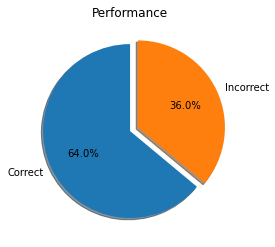

In [84]:
from sklearn.metrics import accuracy_score
predictions = model.predict(validation_x)
predictions
pre = []
for i in range(len(predictions)):
    if predictions[i][1] >= 0.5:
        pre.append(1)
    if predictions[i][1] < 0.5:
        pre.append(0)
        
score = accuracy_score(validation_y,pre)
error = 1 - score        

labels = 'Correct', 'Incorrect'
sizes = [score,error]
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=(0,0.1), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Performance')

plt.show()